In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import xgboost as xgb
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
df=pd.read_csv('D:/dataAnalytics/cervical_cancer/cervical-cancer.csv')
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (years).1,Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [3]:
df.shape

(835, 36)

In [4]:
df.isnull()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (years).1,Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
831,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
832,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
833,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False


<Axes: >

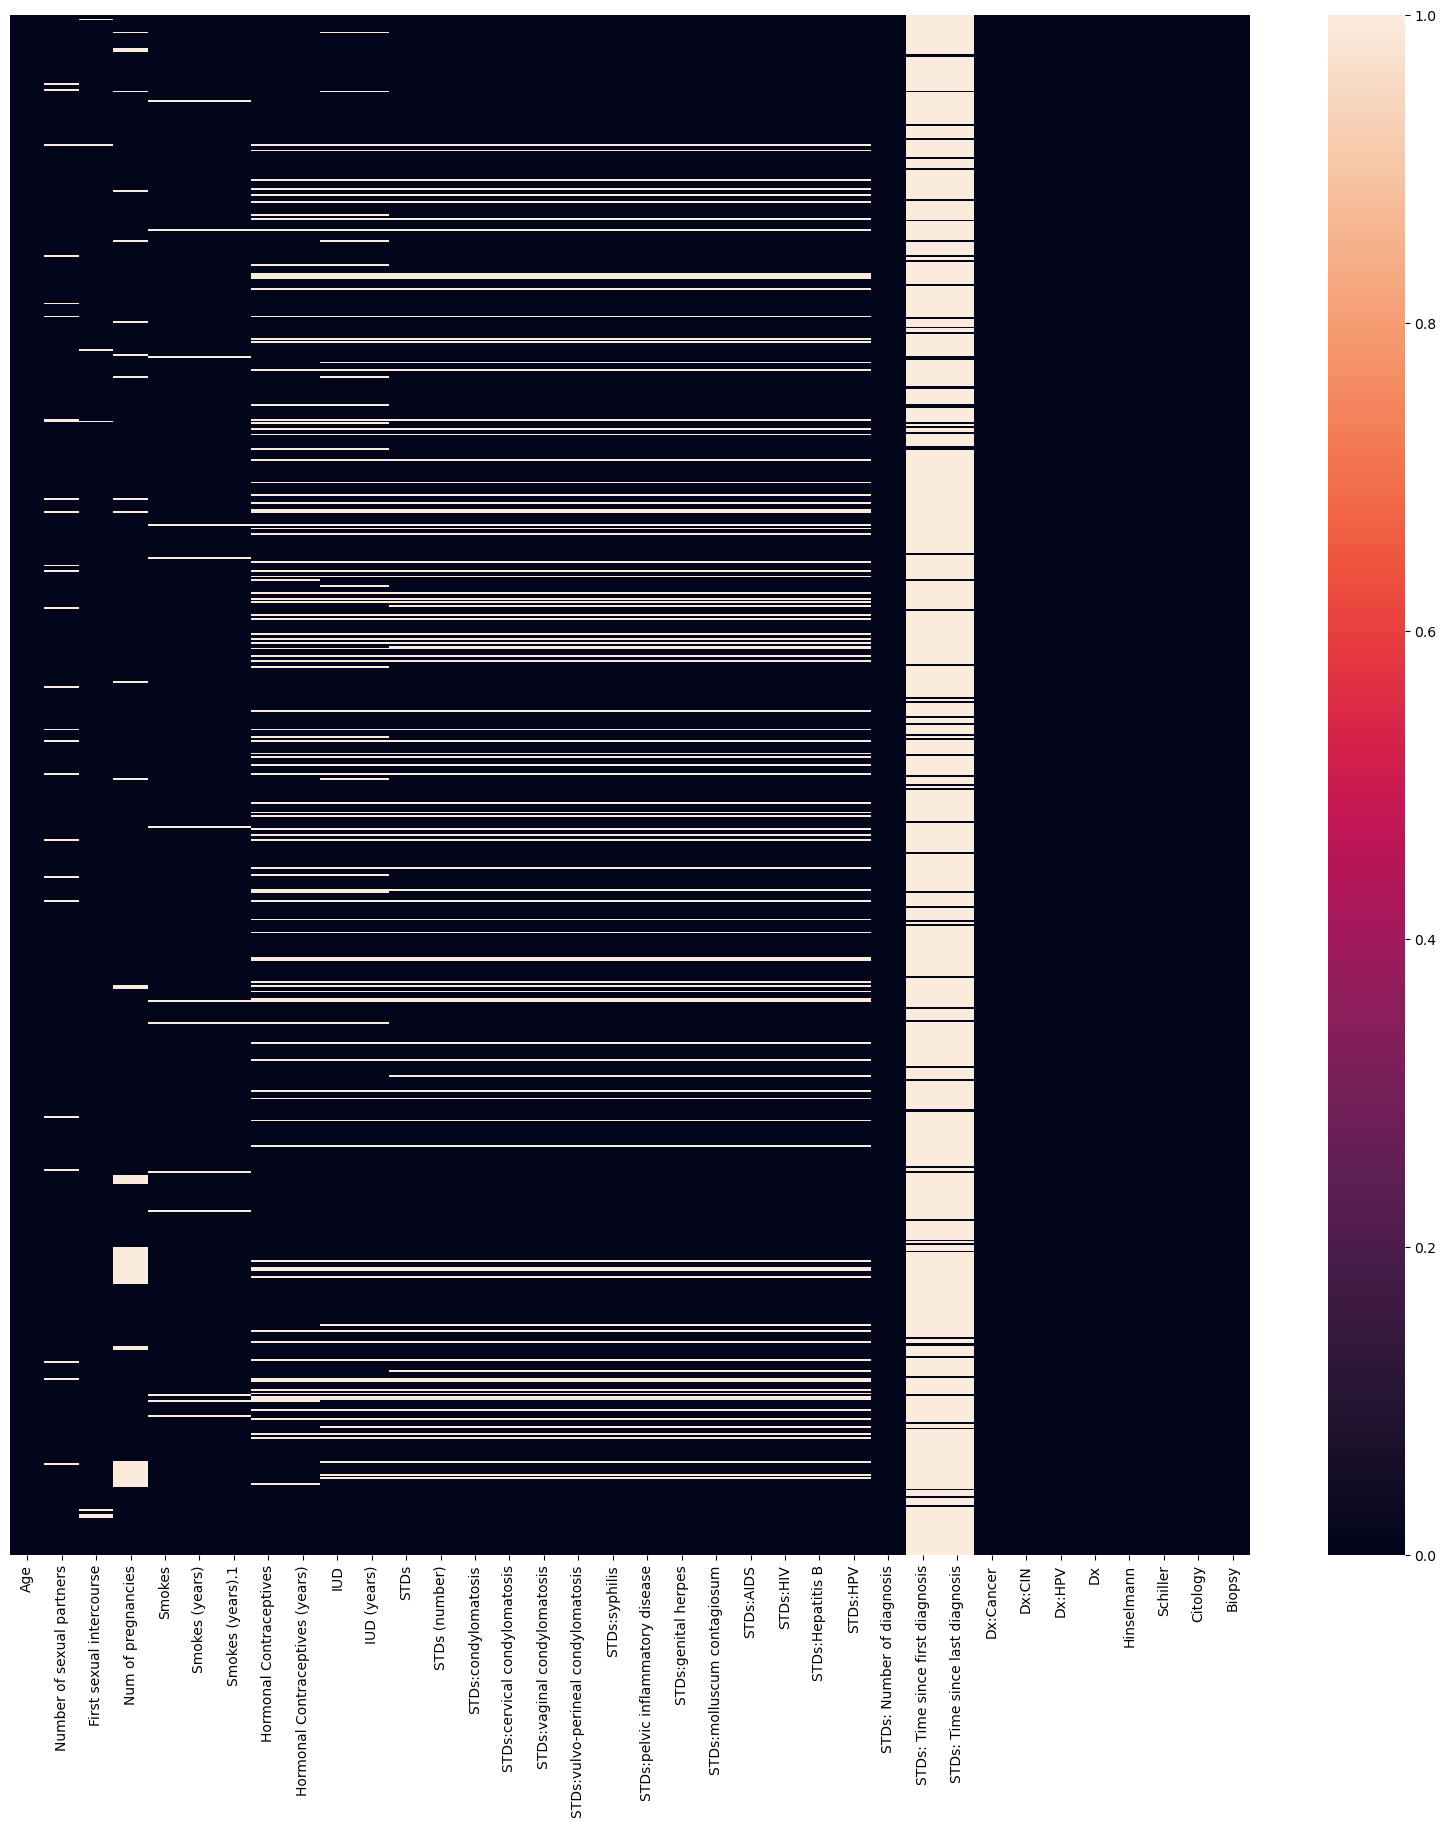

In [5]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),yticklabels=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           810 non-null    float64
 2   First sexual intercourse            828 non-null    float64
 3   Num of pregnancies                  779 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Smokes (years)                      822 non-null    float64
 6   Smokes (years).1                    822 non-null    float64
 7   Hormonal Contraceptives             732 non-null    float64
 8   Hormonal Contraceptives (years)     732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD (years)                         723 non-null    float64
 11  STDs                                735 non-n

In [7]:
#Convert data type in to numaric
df=df.drop(columns=['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (years).1,Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
831,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
832,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
833,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [8]:
df=df.apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           810 non-null    float64
 2   First sexual intercourse            828 non-null    float64
 3   Num of pregnancies                  779 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Smokes (years)                      822 non-null    float64
 6   Smokes (years).1                    822 non-null    float64
 7   Hormonal Contraceptives             732 non-null    float64
 8   Hormonal Contraceptives (years)     732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD (years)                         723 non-null    float64
 11  STDs                                735 non-n

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,835.0,27.023952,8.482986,13.0,21.0,26.0,32.0,84.0
Number of sexual partners,810.0,2.551852,1.676686,1.0,2.0,2.0,3.0,28.0
First sexual intercourse,828.0,17.020531,2.817000,10.0,15.0,17.0,18.0,32.0
Num of pregnancies,779.0,2.304236,1.455817,0.0,1.0,2.0,3.0,11.0
Smokes,822.0,0.149635,0.356930,0.0,0.0,0.0,0.0,1.0
Smokes (years),822.0,1.253850,4.140727,0.0,0.0,0.0,0.0,37.0
Smokes (years).1,822.0,0.465823,2.256273,0.0,0.0,0.0,0.0,37.0
Hormonal Contraceptives,732.0,0.651639,0.476777,0.0,0.0,1.0,1.0,1.0
Hormonal Contraceptives (years),732.0,2.302916,3.794180,0.0,0.0,0.5,3.0,30.0
IUD,723.0,0.114799,0.319000,0.0,0.0,0.0,0.0,1.0


In [10]:
df.mean()

Age                                   27.023952
Number of sexual partners              2.551852
First sexual intercourse              17.020531
Num of pregnancies                     2.304236
Smokes                                 0.149635
Smokes (years)                         1.253850
Smokes (years).1                       0.465823
Hormonal Contraceptives                0.651639
Hormonal Contraceptives (years)        2.302916
IUD                                    0.114799
IUD (years)                            0.527621
STDs                                   0.107483
STDs (number)                          0.180952
STDs:condylomatosis                    0.059864
STDs:cervical condylomatosis           0.000000
STDs:vaginal condylomatosis            0.005442
STDs:vulvo-perineal condylomatosis     0.058503
STDs:syphilis                          0.024490
STDs:pelvic inflammatory disease       0.001361
STDs:genital herpes                    0.001361
STDs:molluscum contagiosum             0

In [11]:
#Replace missing values with average
df=df.fillna(df.mean())

<Axes: >

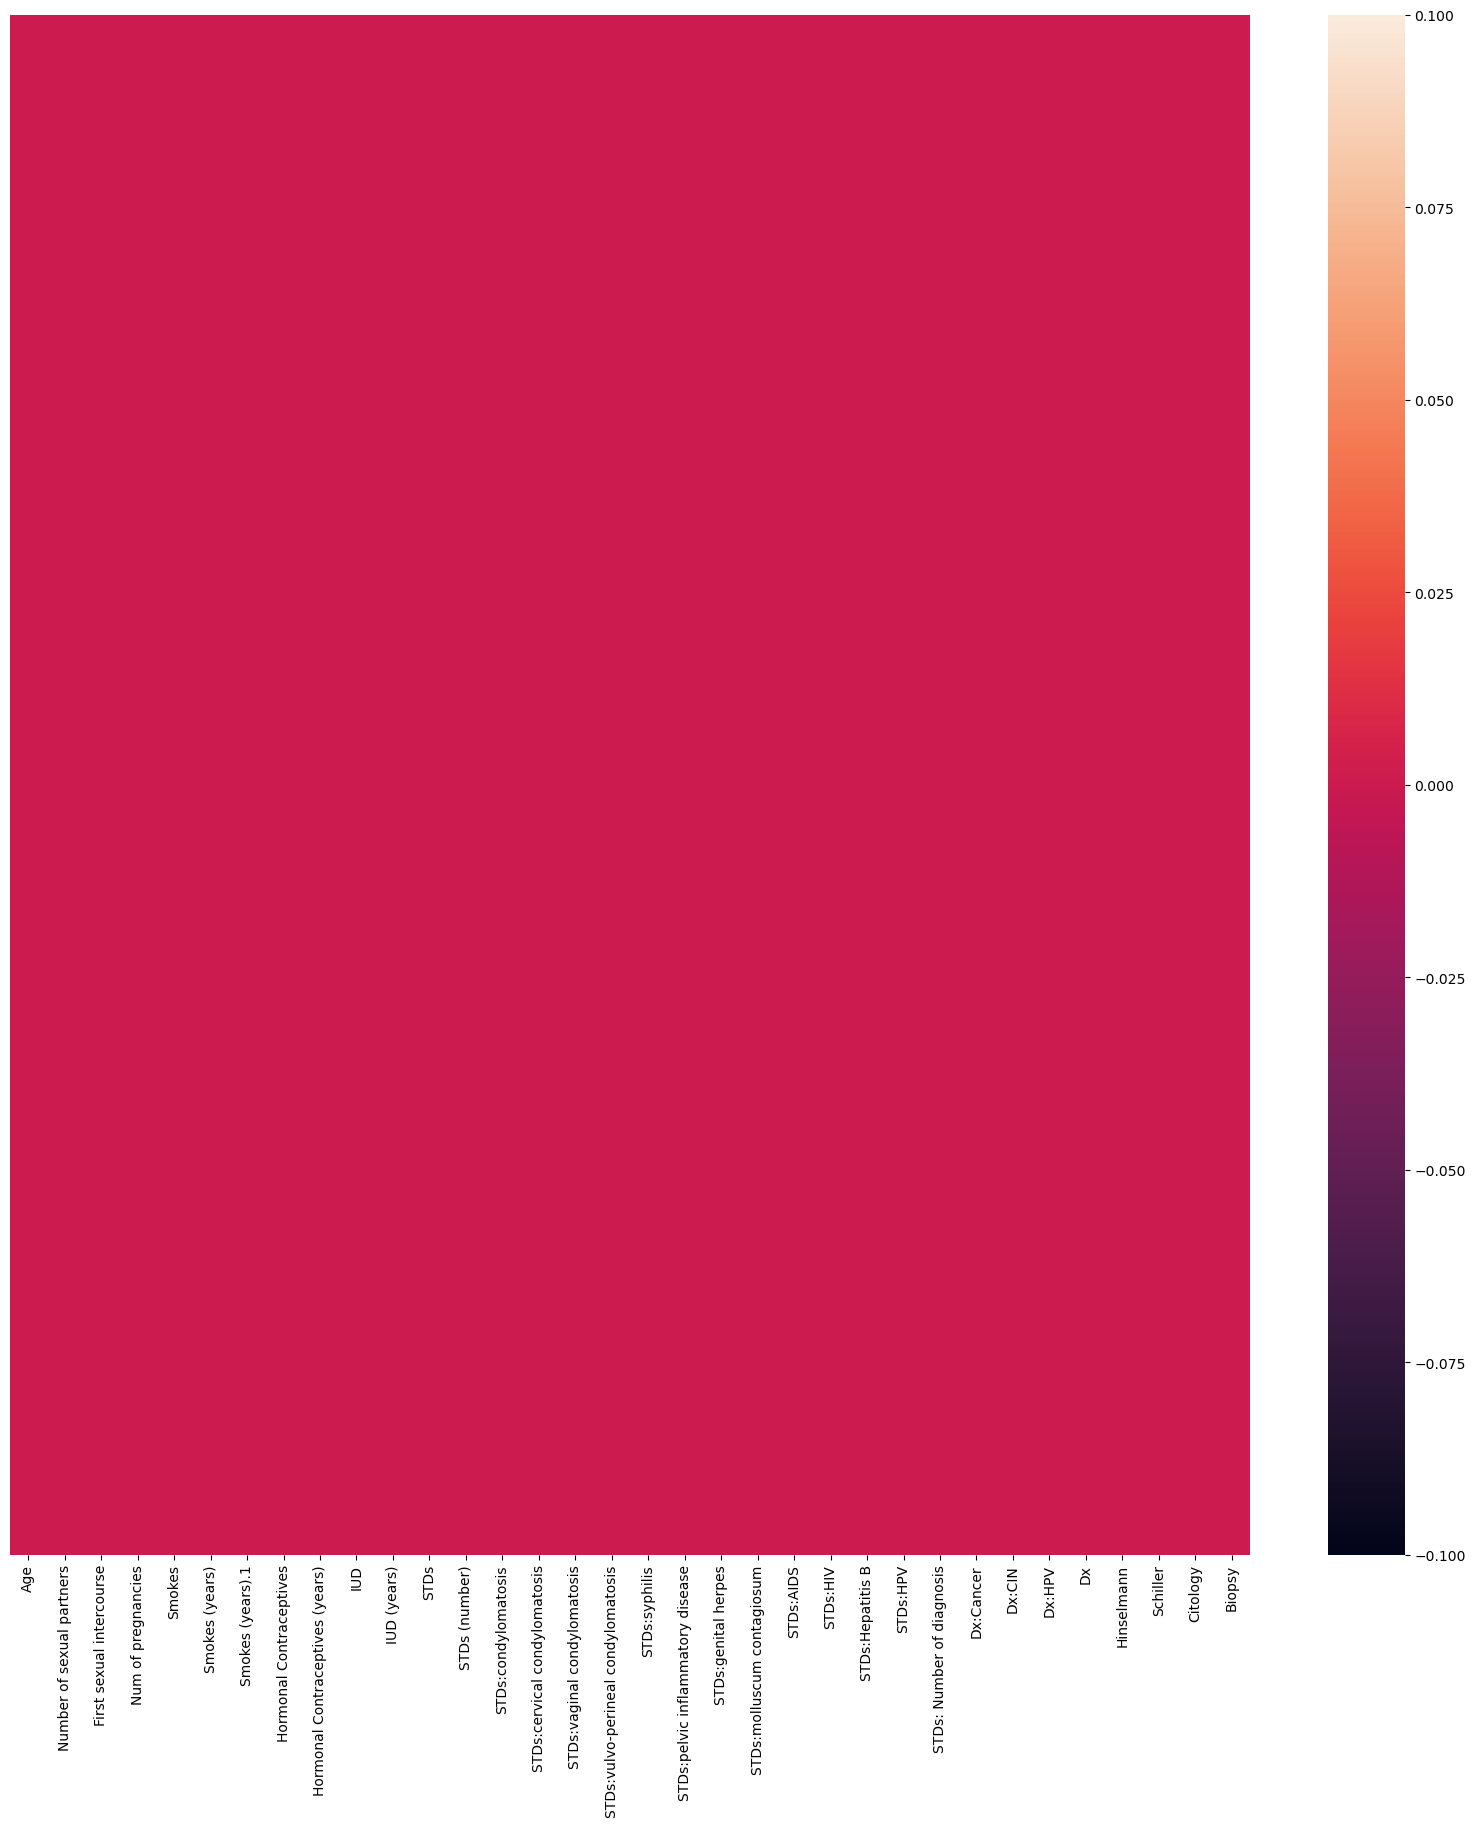

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),yticklabels=False)

In [13]:
corr=df.corr()
corr

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (years).1,Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.070393,0.360942,0.516255,0.046625,0.213631,0.128271,0.039047,0.267937,0.264234,...,0.037987,-0.008673,0.108519,0.059899,0.099765,0.089979,-0.009050,0.101150,-0.019194,0.054396
Number of sexual partners,0.070393,1.000000,-0.155194,0.066302,0.234549,0.174446,0.173685,-0.009221,0.010643,0.025579,...,0.013303,0.047791,0.020319,0.014289,0.025316,0.020654,-0.042595,-0.017298,0.014021,-0.009584
First sexual intercourse,0.360942,-0.155194,1.000000,-0.070213,-0.128780,-0.061682,-0.058716,0.003008,0.001125,-0.024437,...,0.032938,-0.016102,0.066566,-0.033861,0.043034,0.034535,-0.018585,0.003783,-0.009438,0.008496
Num of pregnancies,0.516255,0.066302,-0.070213,1.000000,0.073625,0.170801,0.094033,0.125954,0.199409,0.194578,...,-0.029361,0.028102,0.032414,0.006463,0.044150,0.016422,0.035146,0.087259,-0.029993,0.044011
Smokes,0.046625,0.234549,-0.128780,0.073625,1.000000,0.722303,0.492470,-0.010657,0.039673,-0.054692,...,0.048794,0.092576,-0.012670,-0.044132,0.010629,-0.069700,0.032292,0.052422,-0.004358,0.028471
Smokes (years),0.213631,0.174446,-0.061682,0.170801,0.722303,1.000000,0.723737,-0.017558,0.045585,0.025168,...,0.050636,0.079563,0.053593,-0.031877,0.056138,-0.050345,0.069674,0.094223,-0.007120,0.061448
Smokes (years).1,0.128271,0.173685,-0.058716,0.094033,0.492470,0.723737,1.000000,0.001623,0.037833,0.006215,...,-0.008668,0.030668,0.107777,-0.021734,0.109668,-0.034325,0.025542,0.017251,0.004477,0.024430
Hormonal Contraceptives,0.039047,-0.009221,0.003008,0.125954,-0.010657,-0.017558,0.001623,1.000000,0.444087,0.026560,...,0.038642,-0.058004,0.023485,-0.005541,0.035531,-0.005400,0.029373,-0.005414,-0.008712,0.008858
Hormonal Contraceptives (years),0.267937,0.010643,0.001125,0.199409,0.039673,0.045585,0.037833,0.444087,1.000000,0.091109,...,0.051646,-0.041006,0.052932,0.001884,0.059837,-0.014990,0.036274,0.078274,0.076046,0.079738
IUD,0.264234,0.025579,-0.024437,0.194578,-0.054692,0.025168,0.006215,0.026560,0.091109,1.000000,...,-0.019070,0.027415,0.109352,0.051267,0.056945,0.137831,0.042244,0.083607,0.007454,0.051631


C:\Users\ASUS\anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


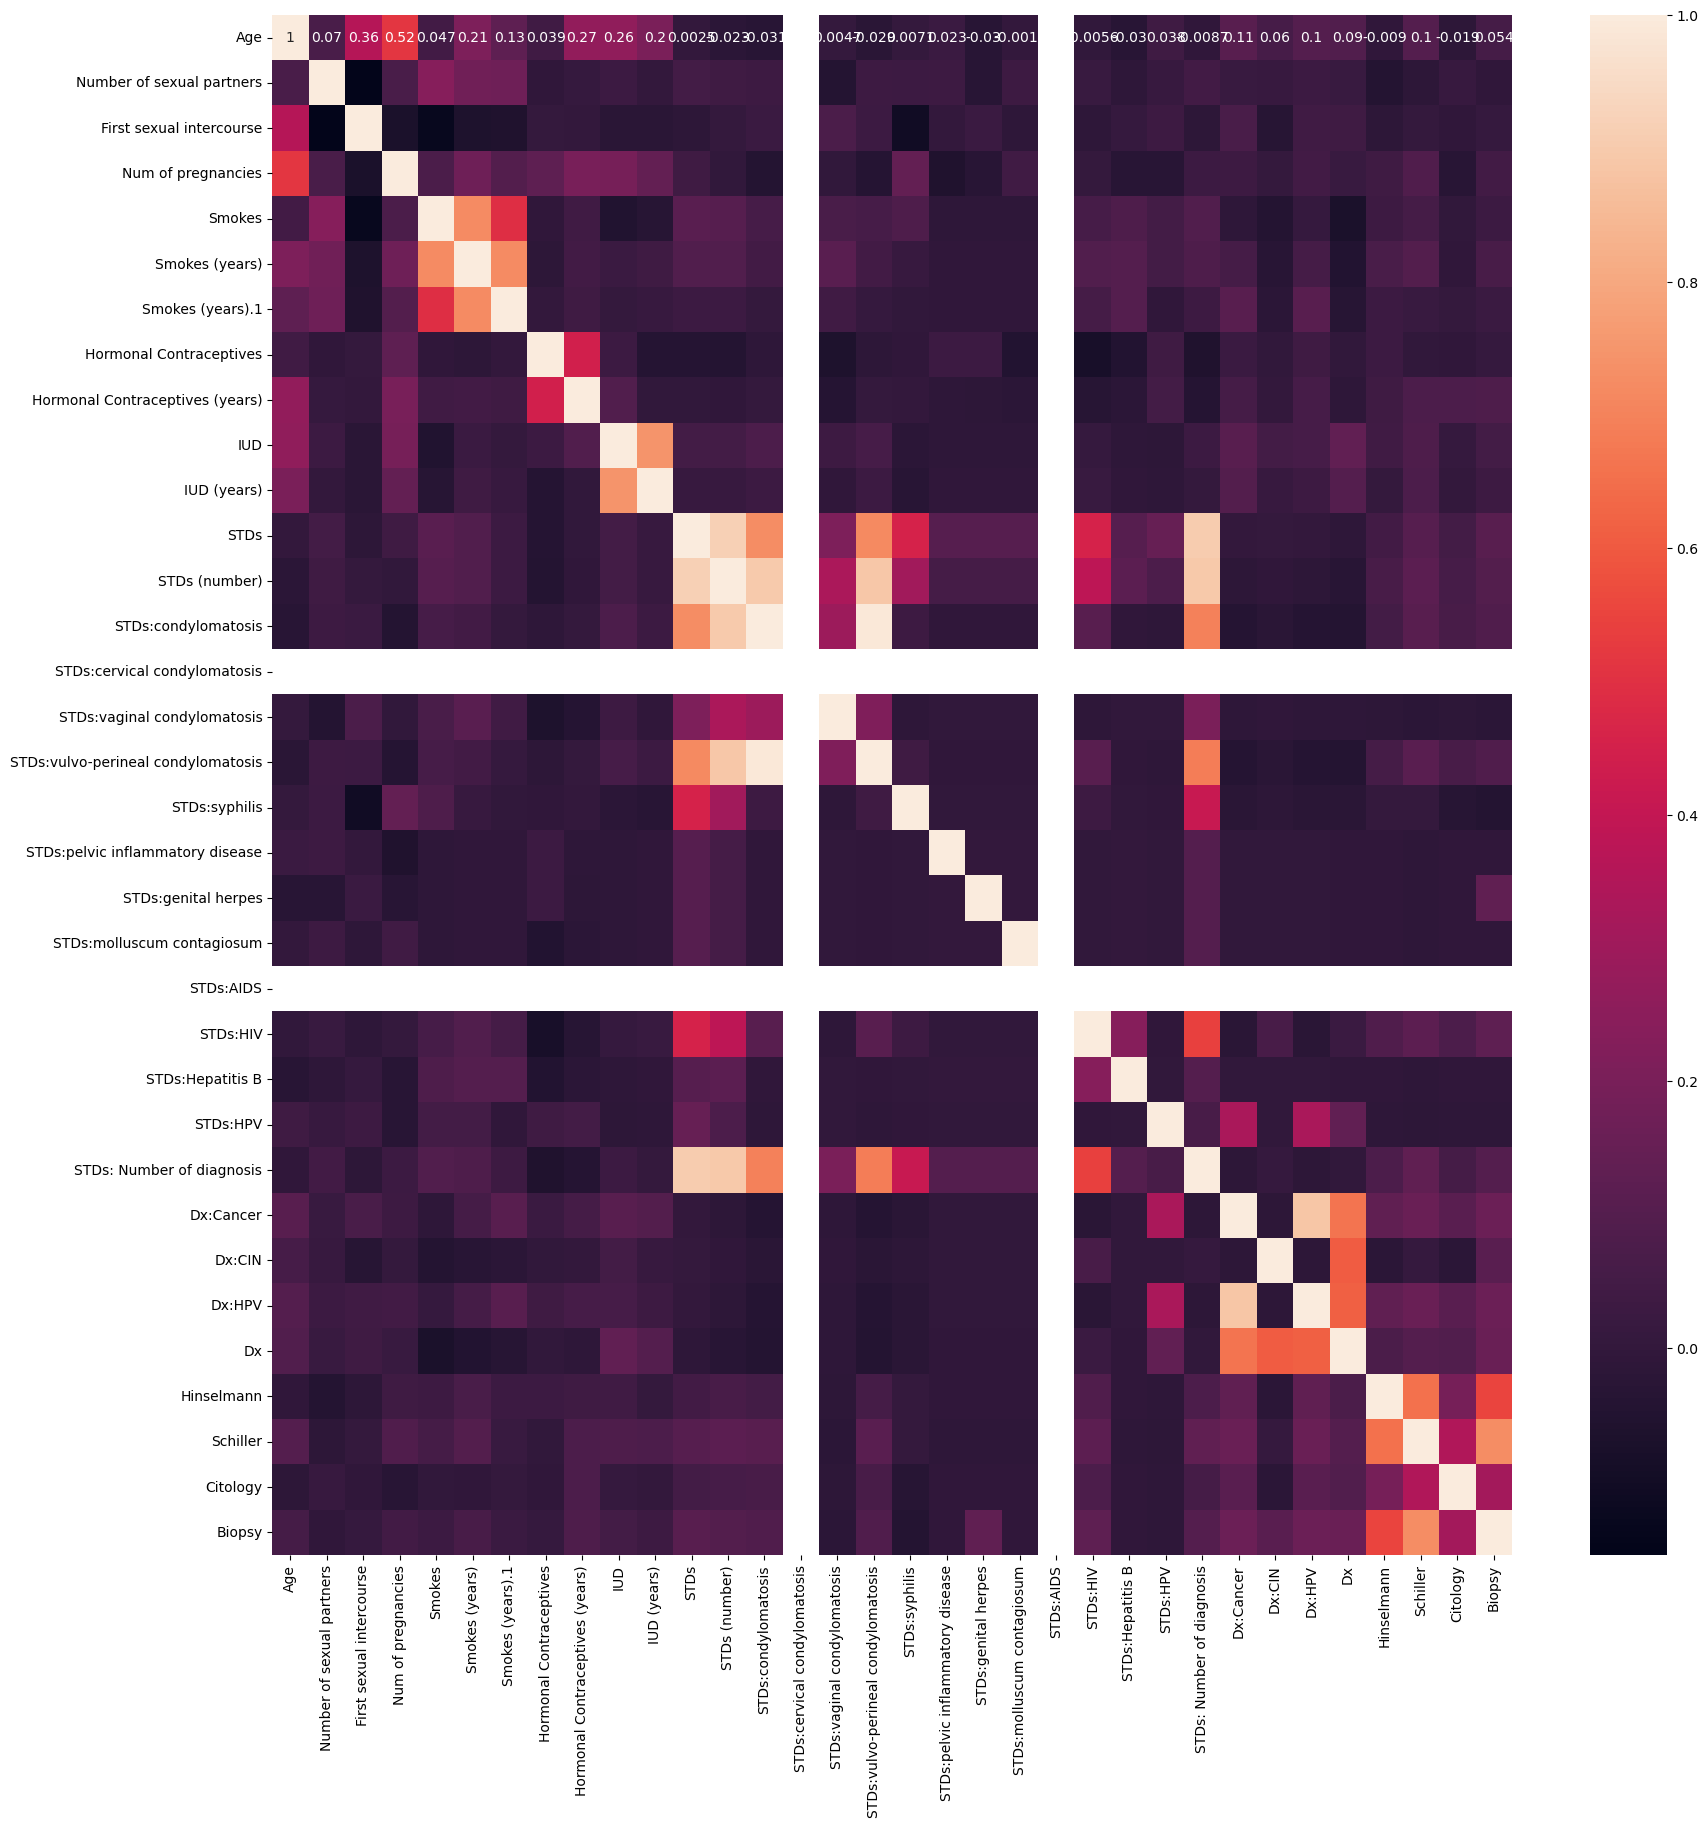

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Number of sexual partners'}>,
        <Axes: title={'center': 'First sexual intercourse'}>,
        <Axes: title={'center': 'Num of pregnancies'}>,
        <Axes: title={'center': 'Smokes'}>,
        <Axes: title={'center': 'Smokes (years)'}>],
       [<Axes: title={'center': 'Smokes (years).1'}>,
        <Axes: title={'center': 'Hormonal Contraceptives'}>,
        <Axes: title={'center': 'Hormonal Contraceptives (years)'}>,
        <Axes: title={'center': 'IUD'}>,
        <Axes: title={'center': 'IUD (years)'}>,
        <Axes: title={'center': 'STDs'}>],
       [<Axes: title={'center': 'STDs (number)'}>,
        <Axes: title={'center': 'STDs:condylomatosis'}>,
        <Axes: title={'center': 'STDs:cervical condylomatosis'}>,
        <Axes: title={'center': 'STDs:vaginal condylomatosis'}>,
        <Axes: title={'center': 'STDs:vulvo-perineal condylomatosis'}>,
        <Axes: title={'center': 'STDs:syphilis'}>],
 

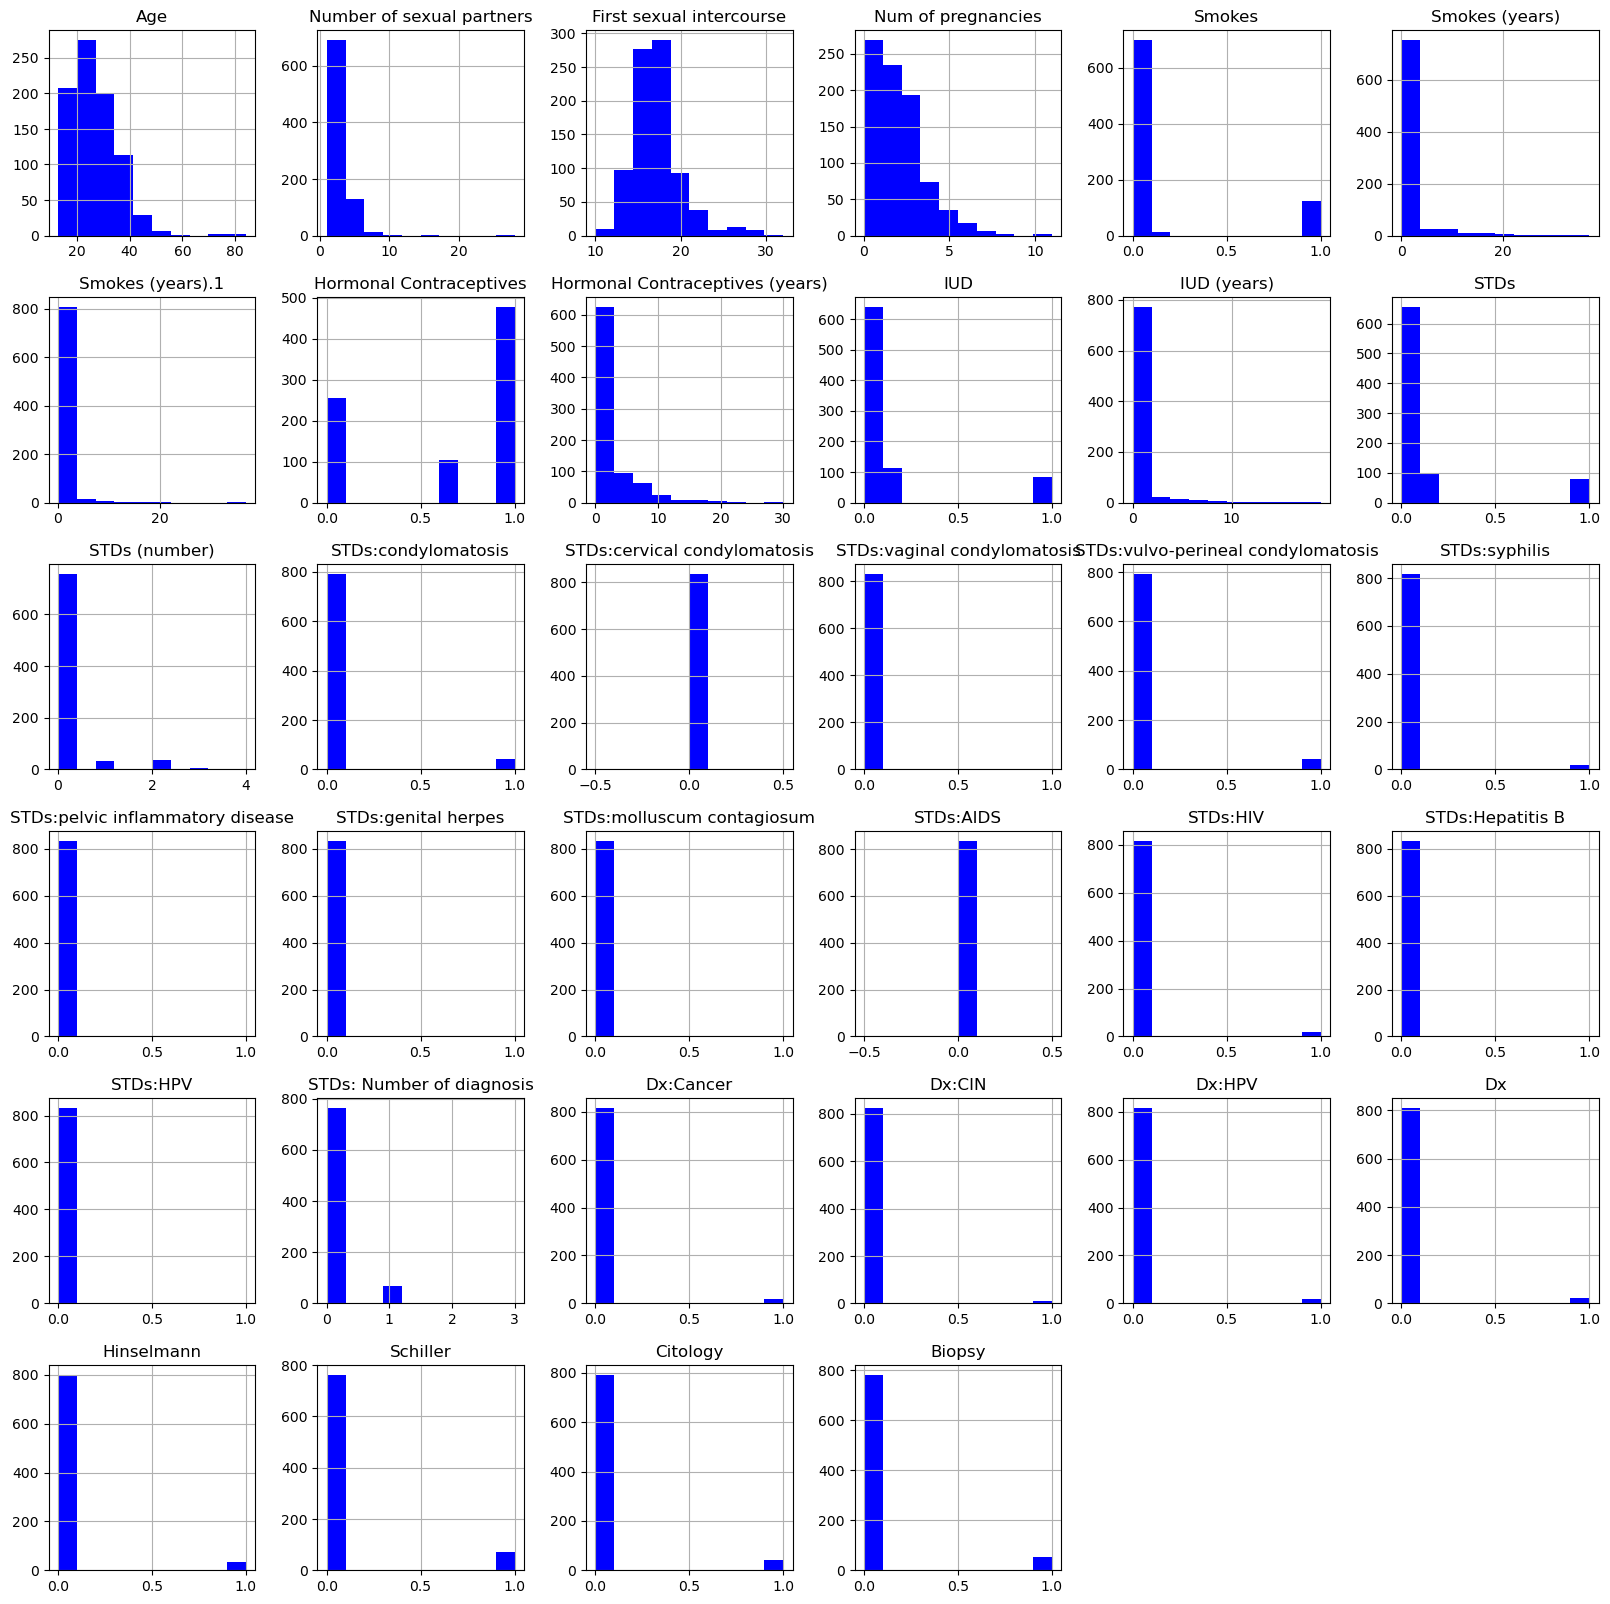

In [19]:
df.hist(bins=10,figsize=(20,20),color='b')

In [20]:
target_df=df['Biopsy']
input_df=df.drop(columns=['Biopsy'])

In [21]:
target_df.shape

(835,)

In [22]:
input_df.shape

(835, 33)

In [23]:
x=np.array(input_df).astype('float32')
y=np.array(target_df).astype('float32')

In [24]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [25]:
x

array([[-1.0644083e+00,  8.7746584e-01, -7.2072434e-01, ...,
        -2.0916502e-01, -3.0951661e-01, -2.3300843e-01],
       [-1.4182693e+00, -9.4030231e-01, -1.0774248e+00, ...,
        -2.0916502e-01, -3.0951661e-01, -2.3300843e-01],
       [ 8.2285047e-01, -9.4030231e-01, -2.4769702e-07, ...,
        -2.0916502e-01, -3.0951661e-01, -2.3300843e-01],
       ...,
       [-2.3873256e-01, -3.3437958e-01, -7.3235566e-03, ...,
        -2.0916502e-01, -3.0951661e-01,  4.2916903e+00],
       [ 7.0489675e-01, -3.3437958e-01,  2.4895792e+00, ...,
        -2.0916502e-01, -3.0951661e-01, -2.3300843e-01],
       [ 2.3308209e-01, -3.3437958e-01,  1.0627776e+00, ...,
        -2.0916502e-01, -3.0951661e-01, -2.3300843e-01]], dtype=float32)

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,test_size=0.5)

In [27]:
model=xgb.XGBClassifier(learning_rate=0.1,max_depth=5,n_estimators=10)

In [28]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
result_train=model.score(x_train,y_train)
result_train

0.9655688622754491

In [30]:
y_pred=model.predict(x_test)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        77
         1.0       0.80      0.67      0.73         6

    accuracy                           0.96        83
   macro avg       0.89      0.83      0.85        83
weighted avg       0.96      0.96      0.96        83



<Axes: >

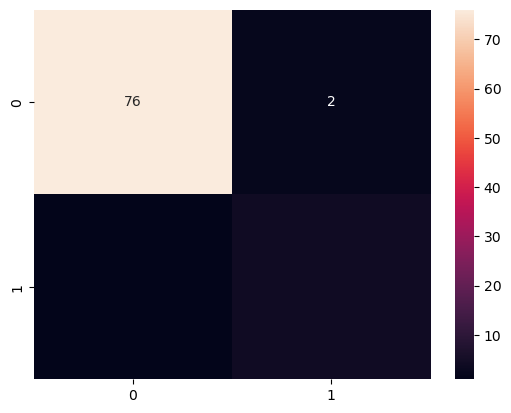

In [32]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True)